<a href="https://colab.research.google.com/github/Niraj-Thorat/Minor-Project/blob/main/(Minor_Project)Image_Classificatiion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we are trying to classify the images of cakes and pizzas. Task has been implemented using Logistic Regression and SVC model with best parameters models. And finally the model is tested on two images, one of pizza and another of cake. Accuracy about 92% is obtained in the used models.

**Importing Libraries**

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
import os

(225, 225, 3)

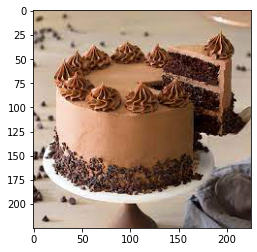

In [82]:
#/content/drive/MyDrive/Dataset/images
img = imread('/content/drive/MyDrive/Dataset/images/Cake/download (1).jpeg')
plt.imshow(img)
img.shape

**Importing Dataset, Resizing & Flattening**

In [83]:
datadir = '/content/drive/MyDrive/Dataset/images'
categories = ['Cake','Pizza']

target = []
flat_data = []

for i in categories:
  path = os.path.join(datadir,i)
  #print(path)
  for img in os.listdir(path):
    #print(img)
    img_array = imread(os.path.join(path,img))
    gray_img_array = rgb2gray(img_array) 
    img_resize = resize(img_array,(150,150))
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(i)
    #plt.imshow(img_resize)
    #plt.show()
flat_data = np.array(flat_data)
target = np.array(target)

**Creating Dataframe**

In [84]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.937255,0.933333,0.937255,0.937255,0.933333,0.937255,0.937255,0.933333,0.937255,0.937752,0.933333,0.937255,0.941176,0.933333,0.937255,0.944758,0.936915,0.937255,0.945098,0.937255,0.941176,0.949020,0.940000,0.945098,0.949020,0.945098,0.945098,0.949020,0.947007,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949255,...,0.951693,0.947359,0.927078,0.961023,0.954668,0.951588,0.958180,0.951395,0.959934,0.958133,0.951711,0.958151,0.957608,0.951882,0.954640,0.956643,0.952341,0.948149,0.954950,0.952588,0.943795,0.955835,0.952941,0.943220,0.956157,0.952941,0.945811,0.956465,0.952941,0.945496,0.956510,0.952941,0.945180,0.956743,0.952708,0.944865,0.957058,0.952588,0.944550,Cake
1,0.270353,0.231373,0.227451,0.268392,0.231373,0.227216,0.262627,0.229412,0.227333,0.254667,0.227333,0.227333,0.217412,0.195961,0.201843,0.176353,0.158706,0.168627,0.141176,0.127451,0.141176,0.133098,0.125255,0.135176,0.135176,0.127333,0.133098,0.137255,0.129412,0.133333,0.140941,0.133098,0.137020,0.141176,0.133333,0.137255,0.141176,0.133333,0.137255,0.141176,...,0.814784,0.768392,0.731490,0.769451,0.717529,0.686275,0.766549,0.711294,0.685922,0.769922,0.711098,0.693569,0.772392,0.707922,0.698235,0.814863,0.744745,0.744745,0.810706,0.740588,0.740824,0.790549,0.718000,0.712235,0.782706,0.706118,0.700353,0.774627,0.694353,0.690431,0.766667,0.684314,0.680392,0.741176,0.654667,0.650863,0.733451,0.639333,0.639333,Cake
2,0.907353,0.948775,0.917402,0.927941,0.958333,0.929902,0.925245,0.941176,0.919363,0.946569,0.949265,0.937745,0.928186,0.926471,0.918627,0.948775,0.942647,0.935539,0.953186,0.948284,0.949265,0.946569,0.948284,0.948529,0.937745,0.949510,0.947059,0.928922,0.946569,0.947794,0.925000,0.944608,0.945098,0.929412,0.943137,0.939951,0.929657,0.943382,0.939461,0.925980,...,0.953922,0.955882,0.947059,0.952206,0.958333,0.942402,0.952206,0.964951,0.939461,0.953922,0.962990,0.937990,0.953186,0.959314,0.935784,0.952941,0.955637,0.937010,0.953676,0.950490,0.939216,0.964706,0.958088,0.954167,0.952941,0.948529,0.946078,0.964706,0.963480,0.964461,0.953676,0.953186,0.953431,0.960784,0.962500,0.965196,0.965931,0.966176,0.968137,Cake
3,0.692418,0.708105,0.704183,0.708039,0.723725,0.716471,0.719281,0.734967,0.731046,0.717712,0.733399,0.729477,0.707647,0.723333,0.721176,0.713725,0.729412,0.725490,0.713154,0.728840,0.725490,0.712118,0.727804,0.724654,0.709804,0.725490,0.721451,0.708301,0.725490,0.719549,0.690980,0.725490,0.706471,0.692222,0.727084,0.707908,0.694702,0.729996,0.710061,0.703673,...,0.952941,0.964706,0.984314,0.952941,0.964706,0.984314,0.952941,0.964706,0.984314,0.952941,0.964706,0.984314,0.952941,0.964706,0.984314,0.952941,0.964706,0.984314,0.951699,0.963464,0.983072,0.949020,0.960784,0.980392,0.947255,0.959020,0.978627,0.945098,0.956797,0.976405,0.945098,0.955229,0.974837,0.949020,0.960784,0.980392,0.949020,0.960784,0.980392,Cake
4,0.624755,0.469118,0.156127,0.759314,0.594853,0.267892,0.816176,0.637500,0.275980,0.866176,0.663235,0.267892,0.886029,0.668137,0.239706,0.888971,0.657108,0.213235,0.885294,0.657353,0.208333,0.885294,0.659559,0.218627,0.898039,0.678676,0.252696,0.921569,0.709559,0.298284,0.934069,0.730392,0.335049,0.921569,0.736275,0.368137,0.922794,0.750245,0.413725,0.921324,...,0.214951,0.110539,0.072549,0.237500,0.129902,0.098039,0.239706,0.115931,0.077451,0.225245,0.103922,0.063971,0.235539,0.122304,0.082353,0.262255,0.157108,0.113480,0.295343,0.195343,0.147304,0.247059,0.147059,0.099020,0.225000,0.120588,0.074755,0.203431,0.090196,0.048039,0.258578,0.136520,0.096569,0.237745,0.112500,0.074020,0.178922,0.083824,0.049020,Cake


**Label Encoding**

In [85]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Target_Label'] = labelencoder.fit_transform(df['Target'])
X = df.iloc[:,:-2].values
print(X[0])  
y = df.iloc[:,-1].values
print(y)
df


[0.9372549  0.93333333 0.9372549  ... 0.95705804 0.95258824 0.9445498 ]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target,Target_Label
0,0.937255,0.933333,0.937255,0.937255,0.933333,0.937255,0.937255,0.933333,0.937255,0.937752,0.933333,0.937255,0.941176,0.933333,0.937255,0.944758,0.936915,0.937255,0.945098,0.937255,0.941176,0.949020,0.940000,0.945098,0.949020,0.945098,0.945098,0.949020,0.947007,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949255,...,0.947359,0.927078,0.961023,0.954668,0.951588,0.958180,0.951395,0.959934,0.958133,0.951711,0.958151,0.957608,0.951882,0.954640,0.956643,0.952341,0.948149,0.954950,0.952588,0.943795,0.955835,0.952941,0.943220,0.956157,0.952941,0.945811,0.956465,0.952941,0.945496,0.956510,0.952941,0.945180,0.956743,0.952708,0.944865,0.957058,0.952588,0.944550,Cake,0
1,0.270353,0.231373,0.227451,0.268392,0.231373,0.227216,0.262627,0.229412,0.227333,0.254667,0.227333,0.227333,0.217412,0.195961,0.201843,0.176353,0.158706,0.168627,0.141176,0.127451,0.141176,0.133098,0.125255,0.135176,0.135176,0.127333,0.133098,0.137255,0.129412,0.133333,0.140941,0.133098,0.137020,0.141176,0.133333,0.137255,0.141176,0.133333,0.137255,0.141176,...,0.768392,0.731490,0.769451,0.717529,0.686275,0.766549,0.711294,0.685922,0.769922,0.711098,0.693569,0.772392,0.707922,0.698235,0.814863,0.744745,0.744745,0.810706,0.740588,0.740824,0.790549,0.718000,0.712235,0.782706,0.706118,0.700353,0.774627,0.694353,0.690431,0.766667,0.684314,0.680392,0.741176,0.654667,0.650863,0.733451,0.639333,0.639333,Cake,0
2,0.907353,0.948775,0.917402,0.927941,0.958333,0.929902,0.925245,0.941176,0.919363,0.946569,0.949265,0.937745,0.928186,0.926471,0.918627,0.948775,0.942647,0.935539,0.953186,0.948284,0.949265,0.946569,0.948284,0.948529,0.937745,0.949510,0.947059,0.928922,0.946569,0.947794,0.925000,0.944608,0.945098,0.929412,0.943137,0.939951,0.929657,0.943382,0.939461,0.925980,...,0.955882,0.947059,0.952206,0.958333,0.942402,0.952206,0.964951,0.939461,0.953922,0.962990,0.937990,0.953186,0.959314,0.935784,0.952941,0.955637,0.937010,0.953676,0.950490,0.939216,0.964706,0.958088,0.954167,0.952941,0.948529,0.946078,0.964706,0.963480,0.964461,0.953676,0.953186,0.953431,0.960784,0.962500,0.965196,0.965931,0.966176,0.968137,Cake,0
3,0.692418,0.708105,0.704183,0.708039,0.723725,0.716471,0.719281,0.734967,0.731046,0.717712,0.733399,0.729477,0.707647,0.723333,0.721176,0.713725,0.729412,0.725490,0.713154,0.728840,0.725490,0.712118,0.727804,0.724654,0.709804,0.725490,0.721451,0.708301,0.725490,0.719549,0.690980,0.725490,0.706471,0.692222,0.727084,0.707908,0.694702,0.729996,0.710061,0.703673,...,0.964706,0.984314,0.952941,0.964706,0.984314,0.952941,0.964706,0.984314,0.952941,0.964706,0.984314,0.952941,0.964706,0.984314,0.952941,0.964706,0.984314,0.951699,0.963464,0.983072,0.949020,0.960784,0.980392,0.947255,0.959020,0.978627,0.945098,0.956797,0.976405,0.945098,0.955229,0.974837,0.949020,0.960784,0.980392,0.949020,0.960784,0.980392,Cake,0
4,0.624755,0.469118,0.156127,0.759314,0.594853,0.267892,0.816176,0.637500,0.275980,0.866176,0.663235,0.267892,0.886029,0.668137,0.239706,0.888971,0.657108,0.213235,0.885294,0.657353,0.208333,0.885294,0.659559,0.218627,0.898039,0.678676,0.252696,0.921569,0.709559,0.298284,0.934069,0.730392,0.335049,0.921569,0.736275,0.368137,0.922794,0.750245,0.413725,0.921324,...,0.110539,0.072549,0.237500,0.129902,0.098039,0.239706,0.115931,0.077451,0.225245,0.103922,0.063971,0.235539,0.122304,0.082353,0.262255,0.157108,0.113480,0.295343,0.195343,0.147304,0.247059,0.147059,0.099020,0.225000,0.120588,0.074755,0.203431,0.090196,0.048039,0.258578,0.136520,0.096569,0.237745,0.112500,0.074020,0.178922,0.083824,0.049020,Cake,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

**Spliting Dataset**

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
print(y_train)
print(y_test)

[0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0
 0]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]


**Feature Scaling**

In [87]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-1.36943418 -1.22608682 -1.08093339 ...  0.79576504  0.90768016
   0.89877607]
 [-1.14609953 -0.62181458 -0.81675225 ... -1.19997046 -1.33659345
  -1.41820971]
 [ 0.45987485 -0.0299625  -0.8174041  ...  0.2674143  -0.22524811
  -0.80718675]
 ...
 [ 0.2215888   0.27895593  0.03209486 ... -0.31941128 -0.29214448
  -0.085844  ]
 [ 0.01661003 -0.02005639 -0.2972262  ...  0.80015853  0.92727077
   0.81137032]
 [ 0.89042956  0.90301223  0.93618643 ...  0.4758227   0.58274011
   0.68256957]]
[[-0.28071557 -0.48249126 -0.5825201  ... -0.3288399  -0.32414117
  -0.51363813]
 [-1.28312452 -1.18038442 -0.89636318 ... -1.96452607 -1.77793298
  -1.51875235]
 [ 0.96277501  1.2062459   1.1578976  ...  1.05410053  1.17450343
   1.19630893]
 ...
 [ 0.34079329  0.51539845  0.56720198 ...  0.99782243  1.15695788
   1.23290005]
 [ 0.26015829 -0.30360506 -0.71993919 ... -0.12350608 -0.71787081
  -1.08628158]
 [ 0.84432707  0.69475894  0.78308269 ...  0.7245882   0.89935741
   1.01774425]]


**Training the Model**



**Logistic Regression**

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**SVC Model with Best Parameters**

In [89]:
from sklearn.model_selection import GridSearchCV
model = SVC()
param = {
    'kernel':['linear','rbf','poly'],
    'C':[0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001]
}

grid = GridSearchCV(model,param,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [90]:
from sklearn.svm import SVC
model = SVC(C= 0.1, kernel= 'linear', gamma = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Predicted Vs Test Results**

In [91]:
print(y_test)
print(y_pred)

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]
[0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0]


**Accuracy of the Model**

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.92

In [93]:
#Confusion Matrix
print(cm) 

[[13  0]
 [ 2 10]]


In [94]:
#Classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



In [95]:
test_pizza = np.ndarray.flatten(resize(imread('/content/drive/MyDrive/Dataset/images/Pizza/download (10).jpeg'),(150,150)))
test_cake = np.ndarray.flatten(resize(imread('/content/drive/MyDrive/Dataset/images/Cake/download (12).jpeg'),(150,150)))
print(model.predict(sc.transform(test_cake.reshape(1,67500)))) # 0 for cake
print(model.predict(sc.transform(test_pizza.reshape(1,67500)))) # 1 for pizza

[0]
[1]
